In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# учитывая разнообразность значений таргета , этот датасет будет преимущественно для регрессии

In [29]:
df=pd.read_csv("suicide.csv")

In [56]:
df.head(10,)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


# country: Этот атрибут обозначает страну, в которой были собраны данные о самоубийствах.
# year: Год, к которому относится информация о самоубийствах.
# sex: Пол населения, для которого собраны данные. Может быть мужским или женским.
# age: Возрастная группа населения, в которой были зафиксированы случаи самоубийств.
# suicides_no: Количество случаев самоубийств в указанном году, стране, поле и возрастной группе.
# population: Общая численность населения в указанной стране, году и возрастной группе.
# suicides/100k pop: Стандартизированная частота самоубийств на 100 тысяч человек населения. Это показатель, позволяющий сравнивать уровень самоубийств между разными странами и годами, учитывая различия в численности населения.
# country-year: Комбинация страны и года, для которой предоставлена информация о самоубийствах. Используется как идентификатор для уникальности данных.
# HDI for year: Индекс человеческого развития (HDI) за соответствующий год и страну. Этот показатель измеряет уровень развития человеческого капитала в стране, учитывая такие факторы, как продолжительность жизни, уровень образования и ВВП на душу населения.
# gdp_for_year ($): Валовый внутренний продукт (ВВП) страны за указанный год, выраженный в долларах США.
# gdp_per_capita ($): Валовый внутренний продукт (ВВП) на душу населения страны за указанный год, также выраженный в долларах США. Этот показатель позволяет оценить экономический уровень жизни в стране.
# generation: Поколение, к которому относится население. Например, "Silent" (молчаливое поколение), "Boomers" (беби-бумеры), "Generation X" (поколение X), "Millenials" (миллениалы), "Generation Z" (поколение Z) и т.д.

<AxesSubplot:>

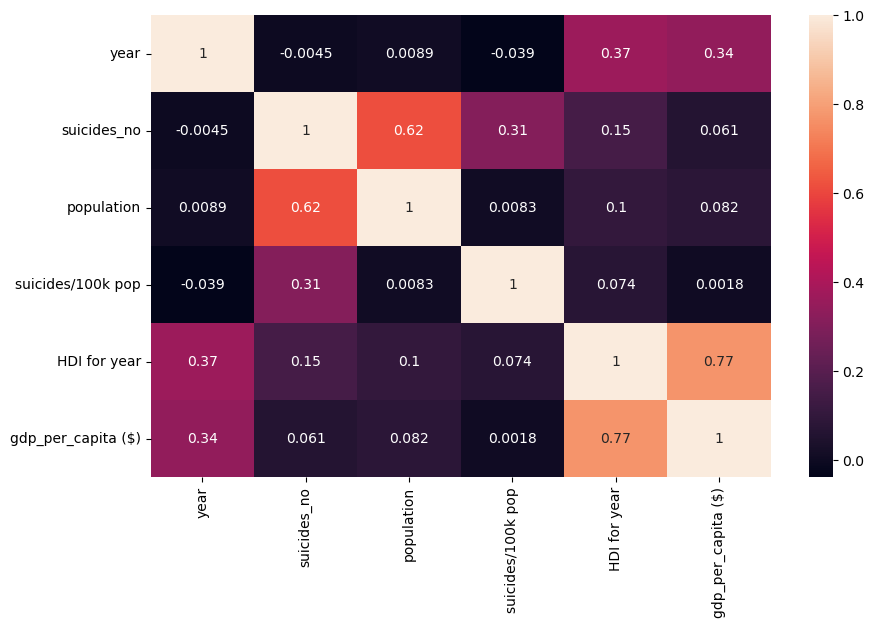

In [12]:
plt.figure(figsize=(10,6))
matr=df.corr()
sns.heatmap(matr,annot=True)

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency
contingency_tables = {}
for column in df.columns:
    if column != 'suicides_no':
        contingency_table = pd.crosstab(df['suicides_no'], df[column])
        contingency_tables[column] = contingency_table
results = {}
for column, contingency_table in contingency_tables.items():
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    results[column] = {'Chi-square': chi2, 'P-value': p_value}

for column, result in results.items():
    print(f"Атрибут: {column}")
    print(f"Статистика Хи-квадрат: {result['Chi-square']}")
    print(f"P-значение: {result['P-value']}")
    print()


Атрибут: country
Статистика Хи-квадрат: 208532.81096322302
P-значение: 0.3588267754978891

Атрибут: year
Статистика Хи-квадрат: 63514.361810765855
P-значение: 0.9984629147115346

Атрибут: sex
Статистика Хи-квадрат: 3235.733938533065
P-значение: 1.801851254608603e-53

Атрибут: age
Статистика Хи-квадрат: 15584.427946561014
P-значение: 9.915045210441414e-214

Атрибут: population
Статистика Хи-квадрат: 57076066.50356861
P-значение: 0.0

Атрибут: suicides/100k pop
Статистика Хи-квадрат: 24130642.420013614
P-значение: 0.0

Атрибут: country-year
Статистика Хи-квадрат: 4856165.39971478
P-значение: 1.7173189561765207e-14

Атрибут: HDI for year
Статистика Хи-квадрат: 305174.0881612399
P-значение: 1.0

Атрибут:  gdp_for_year ($) 
Статистика Хи-квадрат: 4856165.399714775
P-значение: 1.717318956196274e-14

Атрибут: gdp_per_capita ($)
Статистика Хи-квадрат: 4696326.003992523
P-значение: 1.0394262826903758e-53

Атрибут: generation
Статистика Хи-квадрат: 11518.984901228654
P-значение: 6.85434302703799

# Наибольшее влияние:
Население и экономические показатели: Переменные, связанные с населением и экономикой (например, ВВП на душу населения, общий объем ВВП), обладают наибольшим статистическим влиянием на другие переменные в датасете. Это указывает на то, что факторы, связанные с размером и составом населения, а также экономическим развитием, могут играть ключевую роль в уровне самоубийств.

# Наименьшее влияние:
Страна и год: Переменные страны и года не имеют статистически значимой связи с другими переменными в датасете

In [87]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
HDI for year          19456
 gdp_for_year ($)         0
generation                0
dtype: int64

# исходя из сильной корелляции Индекса человеческого развития и Валового внутренний продукта а также большому количеству пропусков у атрибута валовый продукт, я решила его удалитт

In [30]:
df=df.drop(columns=["gdp_per_capita ($)","country-year"])

In [20]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'suicides_no'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'suicides/100k pop'}>],
       [<AxesSubplot:title={'center':'HDI for year'}>, <AxesSubplot:>]],
      dtype=object)

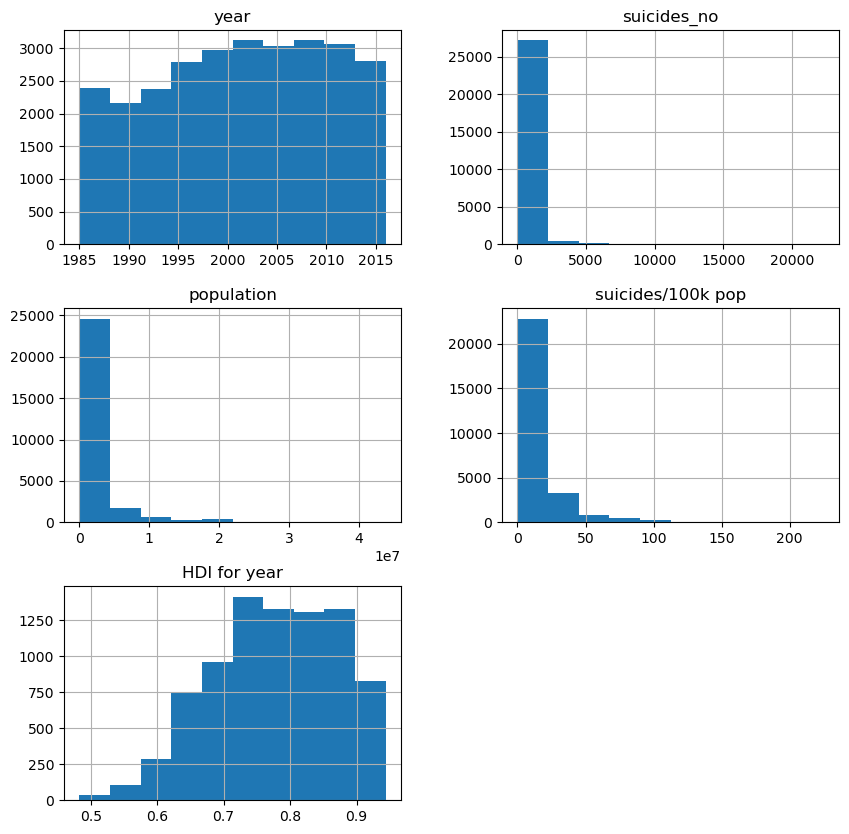

In [28]:
df.hist(figsize=(10,10))

In [34]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
generation             object
dtype: object

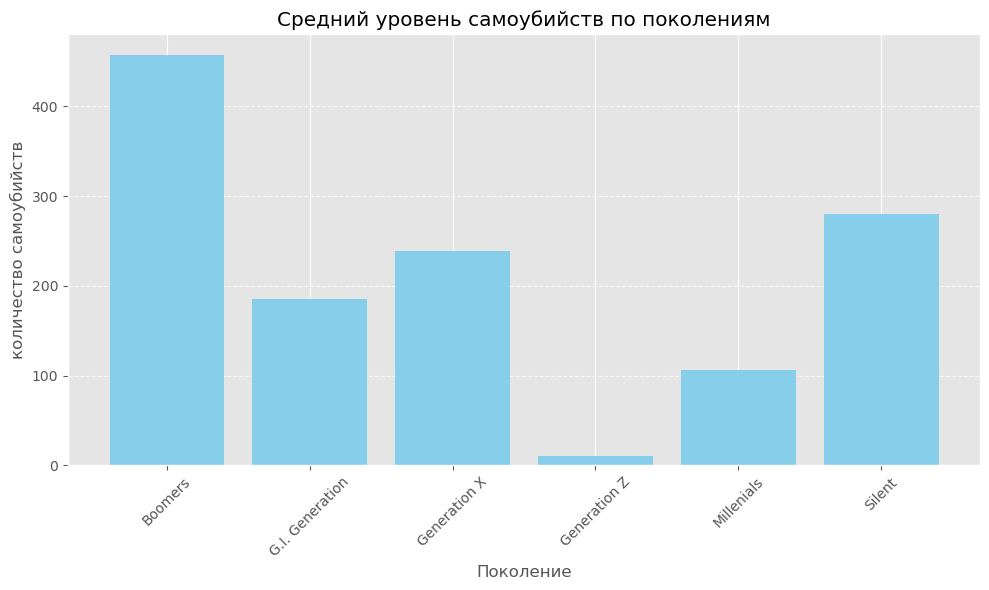

In [45]:
generation_suicides = df.groupby('generation')['suicides_no'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(generation_suicides['generation'], generation_suicides['suicides_no'], color='skyblue')
plt.title('Средний уровень самоубийств по поколениям')
plt.xlabel('Поколение')
plt.ylabel('количество самоубийств')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# больше всего самоубийств приходится на поколение бумеров.поколение людей, родившихся после Второй мировой войны, примерно в период с середины 1940-х до начала 1960-х годов. 

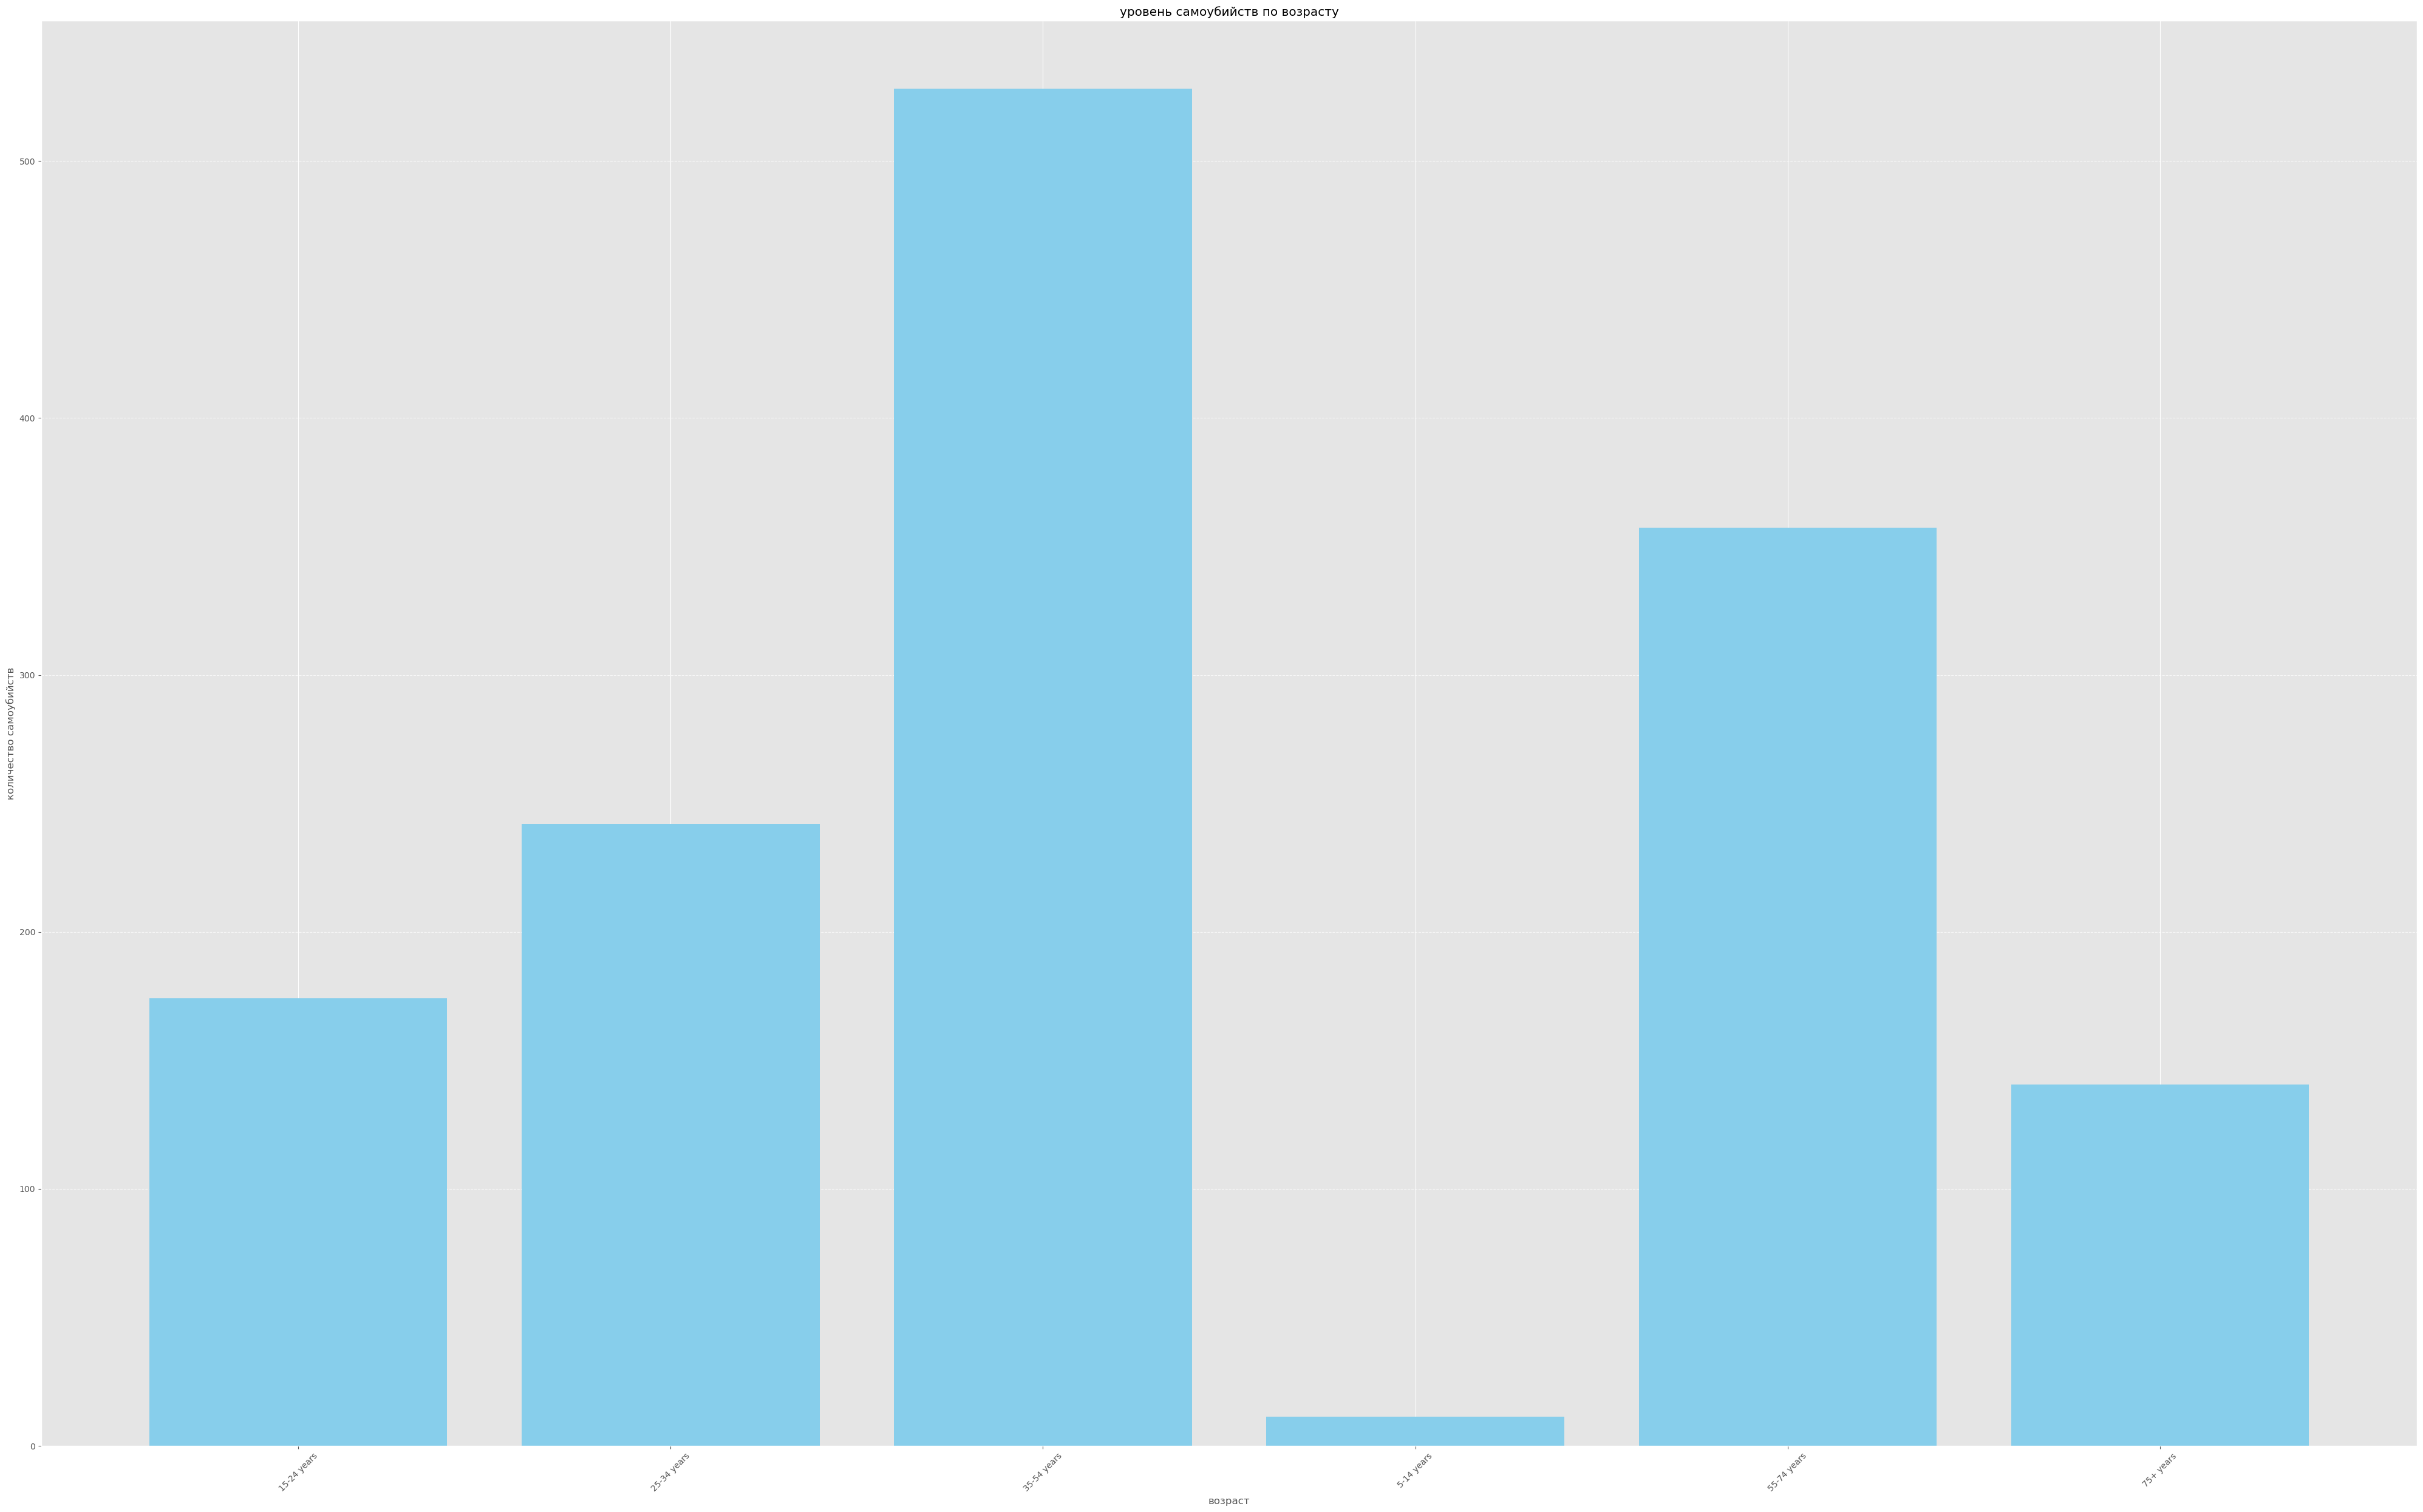

In [59]:
age_suicides = df.groupby('age')['suicides_no'].mean().reset_index()

plt.figure(figsize=(40, 25))
plt.bar(age_suicides['age'], age_suicides['suicides_no'], color='skyblue')
plt.title('уровень самоубийств по возрасту')
plt.xlabel('возраст')
plt.ylabel('количество самоубийств')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# больше всего самоубийств приходтся на возрастную группу 35-54

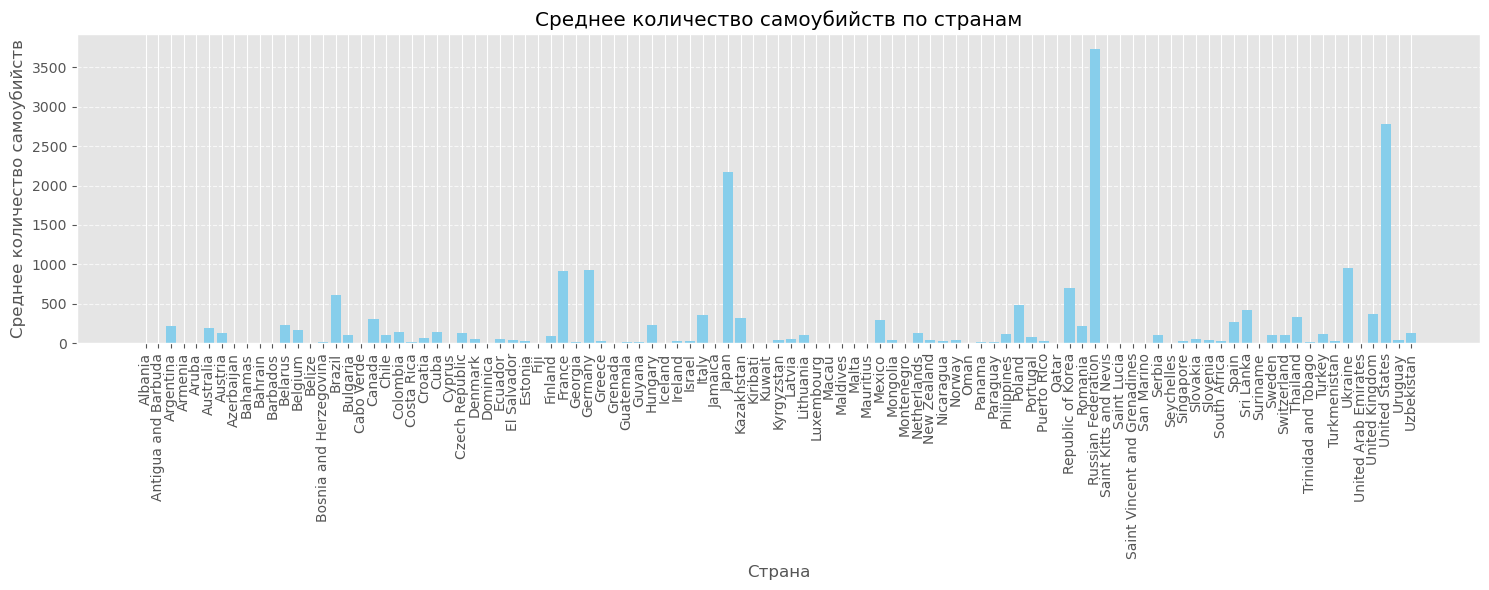

In [81]:
country_suicides = df.groupby('country')['suicides_no'].mean().reset_index()

plt.figure(figsize=(15, 6))
plt.bar(country_suicides['country'], country_suicides['suicides_no'], color='skyblue')
plt.title('Среднее количество самоубийств по странам')
plt.xlabel('Страна')
plt.ylabel('Среднее количество самоубийств')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# самый высокий уровень самоубийств в Российской Федерации

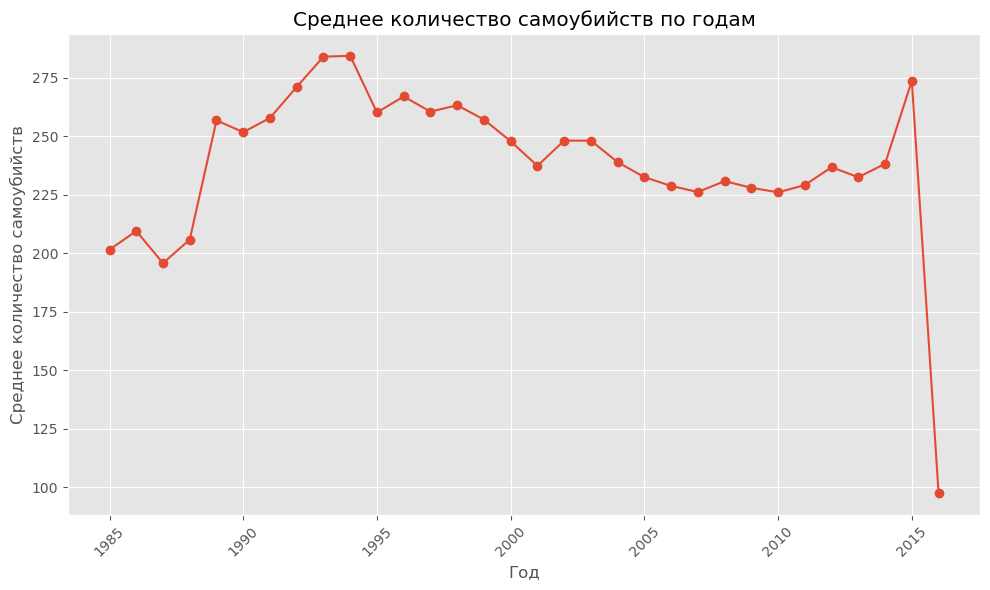

In [75]:
import matplotlib.pyplot as plt
year_suicides = df.groupby('year')['suicides_no'].mean()

plt.figure(figsize=(10, 6))
plt.plot(year_suicides.index, year_suicides.values, marker='o', linestyle='-')
plt.title('Среднее количество самоубийств по годам')
plt.xlabel('Год')
plt.ylabel('Среднее количество самоубийств')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


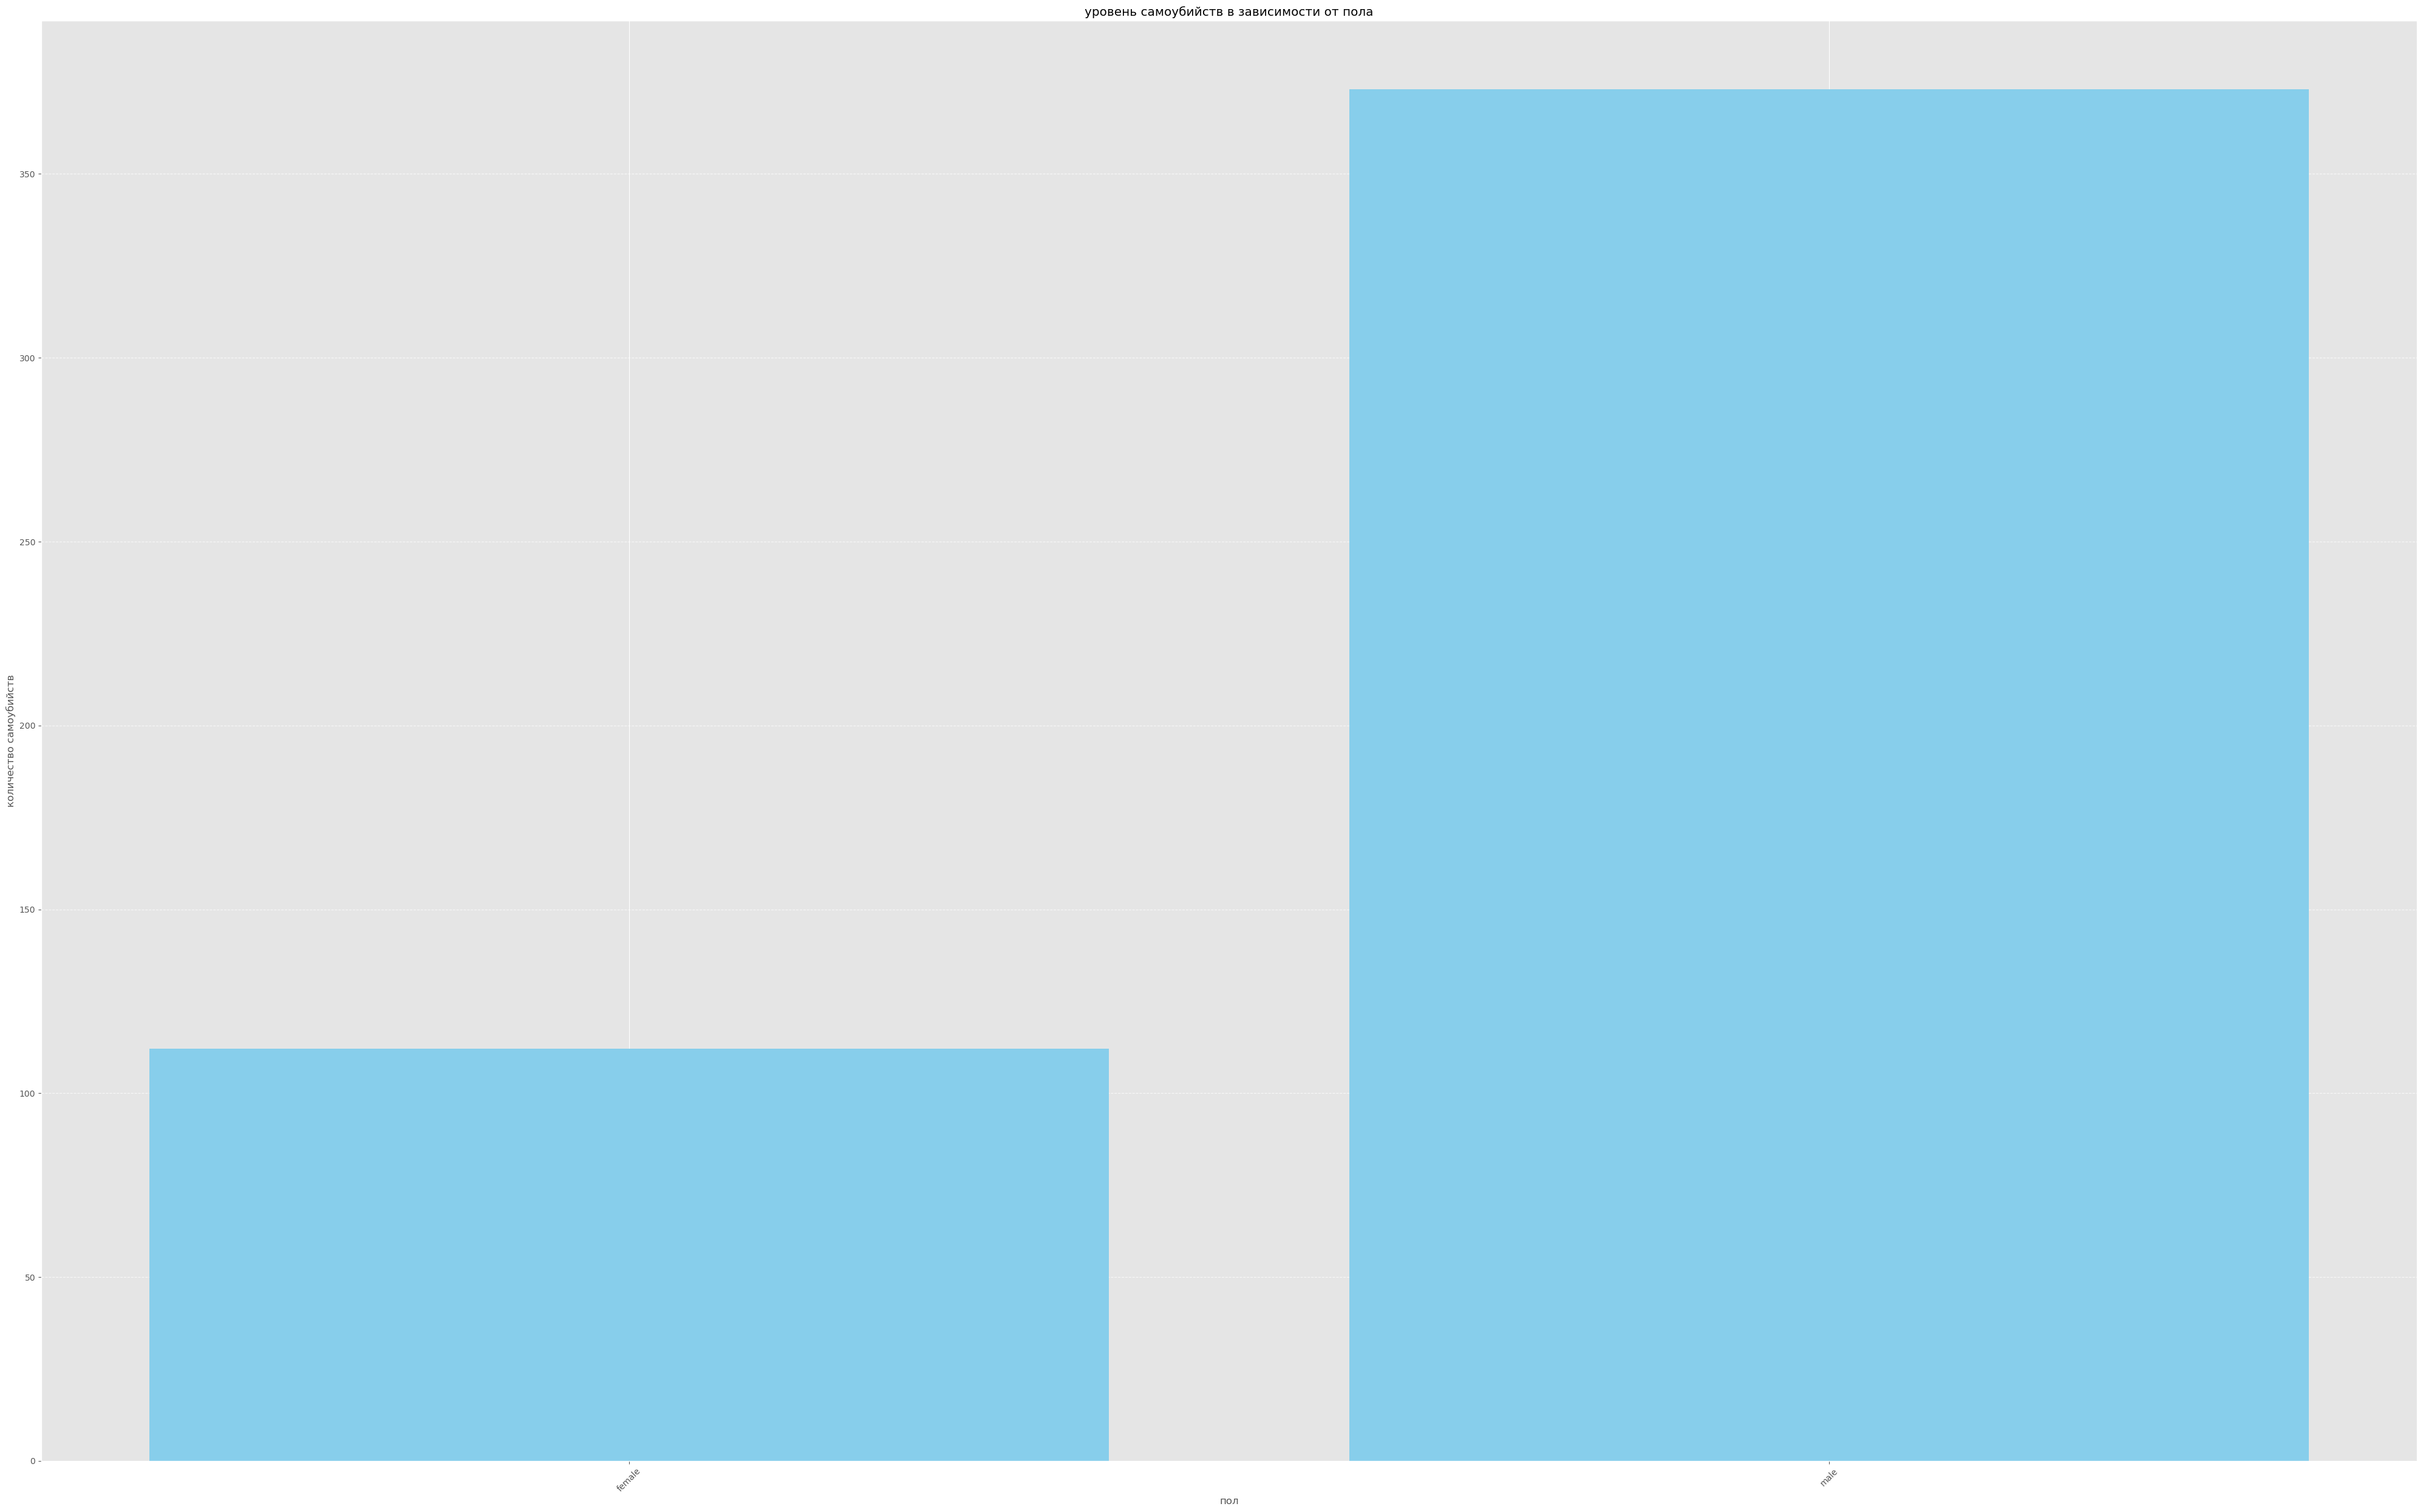

In [83]:
sex_suicides = df.groupby('sex')['suicides_no'].mean().reset_index()

plt.figure(figsize=(40, 25))
plt.bar(sex_suicides['sex'], sex_suicides['suicides_no'], color='skyblue')
plt.title('уровень самоубийств в зависимости от пола')
plt.xlabel('пол')
plt.ylabel('количество самоубийств')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# больше самоубийств у мужчин

## ***Классификация***

# преобразование целевого атрибута для бинарной классификации и заполнение пропусков

In [85]:
df1=df.copy()

In [92]:
mean_hdi = df1['HDI for year'].mean()
df1['HDI for year'].fillna(mean_hdi, inplace=True)
index = df1['suicides_no'] > df1['suicides_no'].mean()
df1.loc[index, 'suicides_no'] = 'High level of suicide'
df1.loc[~index, 'suicides_no'] = 'Low level of suicide'

# One hot encoding

In [87]:
df1 = pd.get_dummies(df, columns=['country','sex','generation','age'])

# Первой моделью будет Catboost

In [29]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [88]:
df1 = df1.replace({',': ''}, regex=True)

In [94]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df1.drop(columns=['suicides_no'])  
y = df1['suicides_no']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', random_seed=42)
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)
y_pred = model.predict(X_test)

0:	learn: 0.4601505	test: 0.4612616	best: 0.4612616 (0)	total: 15.9ms	remaining: 15.9s
100:	learn: 0.0160742	test: 0.0185637	best: 0.0185637 (100)	total: 980ms	remaining: 8.72s
200:	learn: 0.0115018	test: 0.0145094	best: 0.0145094 (200)	total: 1.79s	remaining: 7.13s
300:	learn: 0.0114192	test: 0.0144523	best: 0.0144523 (233)	total: 2.52s	remaining: 5.85s
400:	learn: 0.0114192	test: 0.0144523	best: 0.0144523 (233)	total: 3.24s	remaining: 4.83s
500:	learn: 0.0114192	test: 0.0144523	best: 0.0144523 (233)	total: 3.96s	remaining: 3.94s
600:	learn: 0.0114192	test: 0.0144523	best: 0.0144523 (233)	total: 4.68s	remaining: 3.11s
700:	learn: 0.0114192	test: 0.0144523	best: 0.0144523 (233)	total: 5.4s	remaining: 2.3s
800:	learn: 0.0114192	test: 0.0144523	best: 0.0144523 (233)	total: 6.11s	remaining: 1.52s
900:	learn: 0.0114192	test: 0.0144523	best: 0.0144523 (233)	total: 6.83s	remaining: 751ms
999:	learn: 0.0114192	test: 0.0144523	best: 0.0144523 (233)	total: 7.54s	remaining: 0us

bestTest = 0.014

In [95]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                       precision    recall  f1-score   support

High level of suicide       0.99      0.99      0.99      1426
 Low level of suicide       1.00      1.00      1.00      6920

             accuracy                           1.00      8346
            macro avg       1.00      0.99      0.99      8346
         weighted avg       1.00      1.00      1.00      8346



# Случайный лес

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df1.drop('suicides_no', axis=1) 
y = df1['suicides_no']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=15, max_depth=15, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the model: 0.9840642223819794
Classification Report:
                       precision    recall  f1-score   support

High level of suicide       0.98      0.92      0.95      1387
 Low level of suicide       0.98      1.00      0.99      6959

             accuracy                           0.98      8346
            macro avg       0.98      0.96      0.97      8346
         weighted avg       0.98      0.98      0.98      8346



# модель показывает очень высокую точность

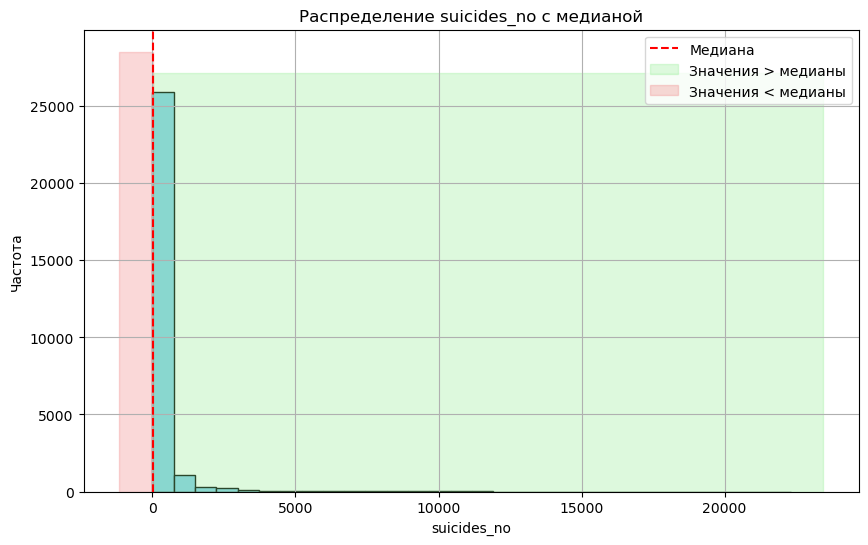

In [50]:
import matplotlib.pyplot as plt

median_suicides_no = df["suicides_no"].median()
plt.figure(figsize=(10, 6))
plt.hist(df["suicides_no"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=median_suicides_no, color='red', linestyle='--', label='Медиана')

plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=median_suicides_no, x2=plt.xlim()[1], color='lightgreen', alpha=0.3, label='Значения > медианы')
plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=plt.xlim()[0], x2=median_suicides_no, color='lightcoral', alpha=0.3, label='Значения < медианы')

plt.title("Распределение suicides_no с медианой")
plt.xlabel("suicides_no")
plt.ylabel("Частота")
plt.grid(True)
plt.legend()
plt.show()


# по распределению видно, что значений выше среднего гораздо больше

In [139]:
X_test_first_model.value_counts().sum()

8346

In [138]:
y_train_first_model.value_counts().sum()

19474

# Дерево

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)

y_pred_val = model.predict(X_val)

accuracy_val = accuracy_score(y_val, y_pred_val)
print("Точность на валидационном наборе:", accuracy_val)

y_pred_test = model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Точность на тестовом наборе:", accuracy_test)

print("Отчет о классификации для тестового набора:")
print(classification_report(y_test, y_pred_test))


Точность на валидационном наборе: 0.9847232207045291
Точность на тестовом наборе: 0.9858015815959741
Отчет о классификации для тестового набора:
                       precision    recall  f1-score   support

High level of suicide       0.97      0.94      0.96       910
 Low level of suicide       0.99      1.00      0.99      4654

             accuracy                           0.99      5564
            macro avg       0.98      0.97      0.97      5564
         weighted avg       0.99      0.99      0.99      5564



# чтобы понять переобучеие это или нет, я создала валидационный набор, но как я вижу, все таки у меня просто хорошие данные, попробуем регрессию

# Регрессия

# Линейная регрессия

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
mean_hdi = df['HDI for year'].mean()
df['HDI for year'].fillna(mean_hdi, inplace=True)
df = df.replace({',': ''}, regex=True)
df = pd.get_dummies(df, columns=['age','sex','country','generation'])

In [32]:
X = df.drop(columns=['suicides_no'])  
y = df['suicides_no'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE на тестовом наборе данных:", test_mae)

MAE на тестовом наборе данных: 235.0302633122742


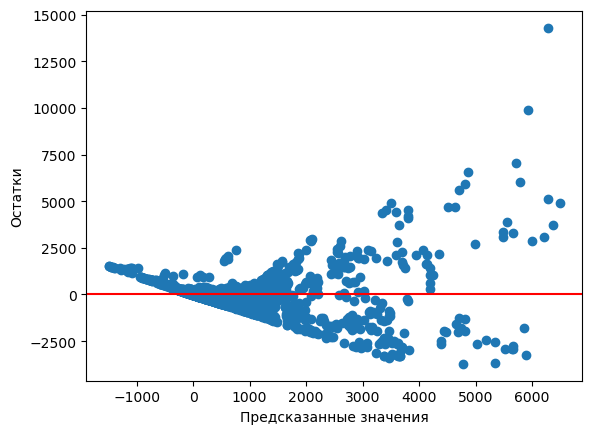

In [98]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


# в целом учитывая то, что у атрибута спектр значений очень разный, можно сказать, что модель очень даже не плохо предсказывает значения

# Нейронная сеть

In [117]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras as keras

2024-04-22 09:57:36.128660: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 09:57:36.133534: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 09:57:37.504847: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5543455744.0000 - val_loss: 447546304.0000
Epoch 2/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1531474944.0000 - val_loss: 1800986496.0000
Epoch 3/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1543152512.0000 - val_loss: 1683707904.0000
Epoch 4/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 803121216.0000 - val_loss: 1305373056.0000
Epoch 5/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 991309952.0000 - val_loss: 116637416.0000
Epoch 6/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 818887680.0000 - val_loss: 290766016.0000
Epoch 7/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 788664448.0000 - val_loss: 83316080.0000
Epoch 8/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 694201984.0000 - val_loss: 287956640.0000
Epoch 9/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 705333568.0000 - val_loss: 112678840.0000
Epoch 10/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 602435776.0000 - val_loss: 

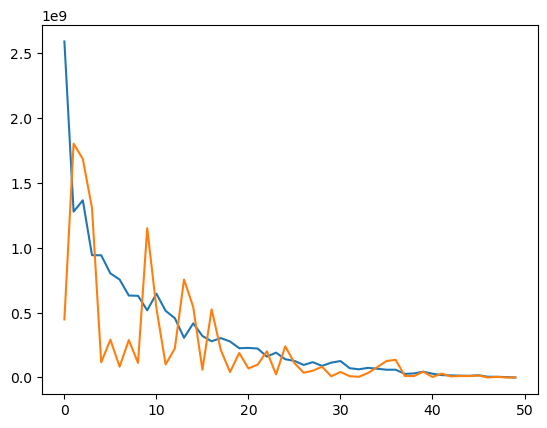

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


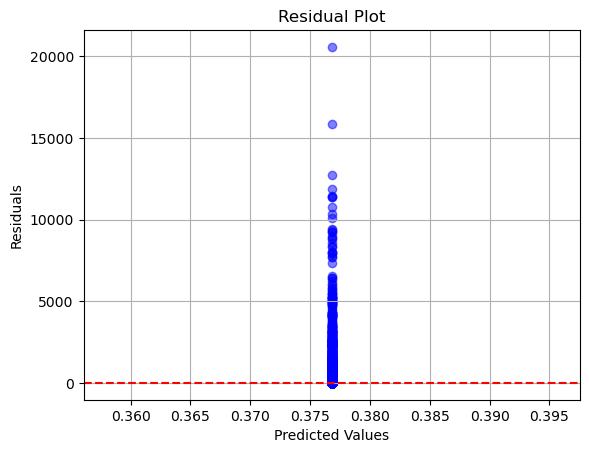

In [10]:
y_pred = model.predict(X_test).flatten()
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


# Дерево регрессии

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
X = df.drop(columns=['suicides_no'])  
y = df['suicides_no'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
params = {
    'max_depth': 50,
    'min_samples_split': 7,
    'min_samples_leaf': 1
}
model = DecisionTreeRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MAE):", mae)

Mean Squared Error (MAE): 13.09030873072929


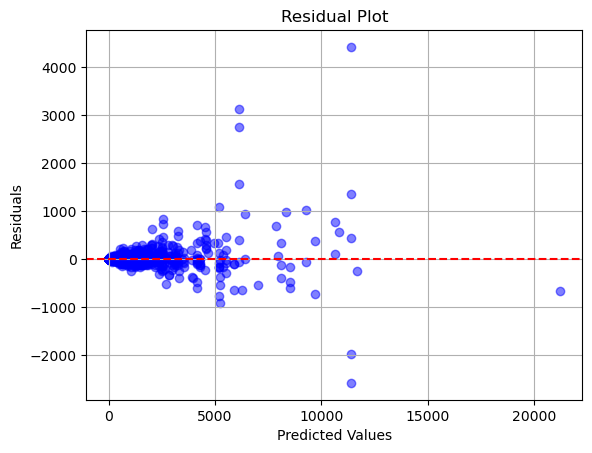

In [40]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


# Cat boost регрессия

In [23]:
from catboost import CatBoostRegressor
X = df.drop(columns=['suicides_no'])  
y = df['suicides_no'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='MAE', random_seed=42)
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

y_pred = model.predict(X_test)

#
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


0:	learn: 228.2720282	test: 212.4117769	best: 212.4117769 (0)	total: 62.6ms	remaining: 1m 2s
100:	learn: 35.3964602	test: 29.0897705	best: 29.0897705 (100)	total: 828ms	remaining: 7.37s
200:	learn: 23.5154433	test: 20.1574056	best: 20.1574056 (200)	total: 1.49s	remaining: 5.93s
300:	learn: 20.1521409	test: 17.6929394	best: 17.6929394 (300)	total: 2.15s	remaining: 5s
400:	learn: 17.3056467	test: 15.4702055	best: 15.4700820 (399)	total: 2.82s	remaining: 4.21s
500:	learn: 15.3058201	test: 14.0422099	best: 14.0419711 (498)	total: 3.48s	remaining: 3.47s
600:	learn: 13.7041075	test: 12.9768214	best: 12.9768214 (600)	total: 4.14s	remaining: 2.75s
700:	learn: 12.3041864	test: 11.9763945	best: 11.9758503 (699)	total: 4.8s	remaining: 2.05s
800:	learn: 11.5250985	test: 11.4293910	best: 11.4293910 (800)	total: 5.45s	remaining: 1.35s
900:	learn: 11.2403351	test: 11.1990286	best: 11.1987113 (899)	total: 6.11s	remaining: 672ms
999:	learn: 10.7068256	test: 10.9315159	best: 10.9315159 (999)	total: 6.75

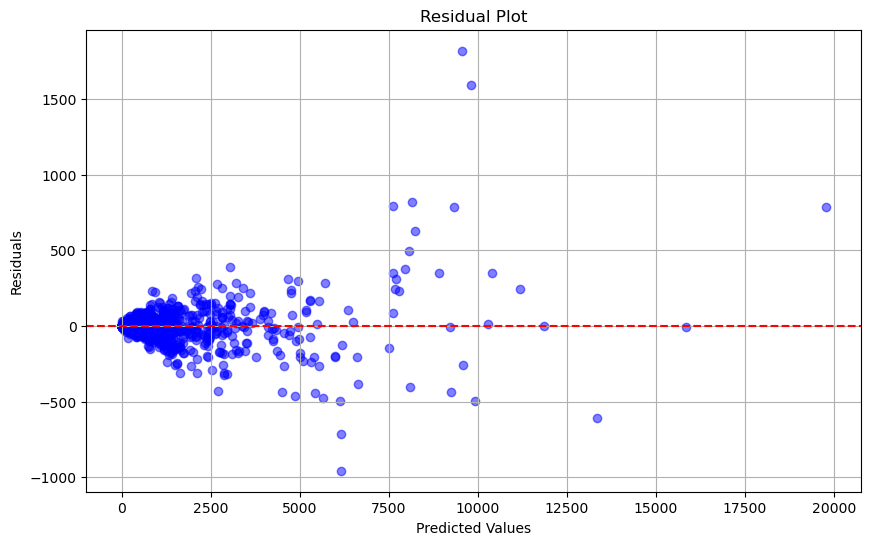

In [25]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# можно сделать выводы что данные идеально разделены для классификации и выдают результат почти равный 100. если говорить про модели регрессии, тут результаты очень разные , лучше всего с задачей справился CAT boost.

# параметры для моделей я выставляла вручную